Inspired from https://medium.com/@vaibhaw.vipul/building-autoencoder-in-pytorch-34052d1d280c and https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

## Imports

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader

In [2]:
import sys
sys.path.append('../')

from utils.ImageDisplay import show_some, imshow
from utils.ModelSummary import summarize
from utils.TrainedModels import save_trained, load_trained
from models.SmallConvAutoencoderModel import Autoencoder

torch.Size([1024, 1024, 3])
torch.Size([3, 1024, 1024])


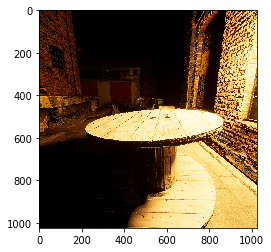

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
filePath1 = "../../../VIDIT/train/scene_abandonned_city_54/2500/E/image1015.png"
img1 = mpimg.imread(filePath1)[:,:,0:3]
implot1 = plt.imshow(img1)
img1=torch.from_numpy(img1)
print(img1.shape)
img1 = img1.permute(2,0,1)
print(img1.shape)

torch.Size([1024, 1024, 3])
torch.Size([3, 1024, 1024])


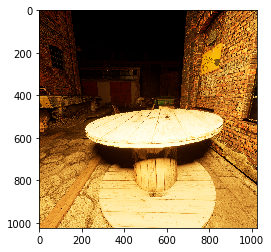

In [4]:
filePath2 = "../../../VIDIT/train/scene_abandonned_city_54/2500/S/image1025.png"
img2 = mpimg.imread(filePath2)[:,:,0:3]
implot2 = plt.imshow(img2)
img2=torch.from_numpy(img2)
print(img2.shape)
img2 = img2.permute(2,0,1)
print(img2.shape)

## Loading and Transforming data

In [5]:
class OneImageDataset(Dataset):
    def __init__(self):
        self.samples=[(Variable(img1).cuda(),Variable(img2).cuda())]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]
    
trainloader = OneImageDataset()
testloader = OneImageDataset()

## About the model

In [6]:
model = Autoencoder().cuda()
distance = nn.MSELoss().cuda() #We can modify this, eg input and output must have same edges, we should experiment differents ones
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [7]:
summarize(model, input_size=img1.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 6, 1020, 1020]             456
              ReLU-2        [-1, 6, 1020, 1020]               0
            Conv2d-3       [-1, 16, 1016, 1016]           2,416
              ReLU-4       [-1, 16, 1016, 1016]               0
   ConvTranspose2d-5        [-1, 6, 1020, 1020]           2,406
              ReLU-6        [-1, 6, 1020, 1020]               0
   ConvTranspose2d-7        [-1, 3, 1024, 1024]             453
              ReLU-8        [-1, 3, 1024, 1024]               0
Total params: 5,731
Trainable params: 5,731
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 12.00
Forward/backward pass size (MB): 490.52
Params size (MB): 0.02
Estimated Total Size (MB): 502.54
----------------------------------------------------------------
None


## Training

In [8]:
#defining some params
num_epochs = 20000 #you can go for more epochs

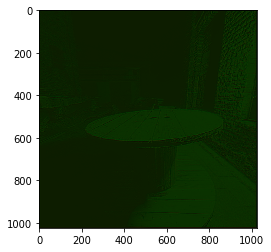

epoch [1/20000], loss:0.2377
epoch [101/20000], loss:0.0746
epoch [201/20000], loss:0.0707
epoch [301/20000], loss:0.0687
epoch [401/20000], loss:0.0674
epoch [501/20000], loss:0.0660
epoch [601/20000], loss:0.0657
epoch [701/20000], loss:0.0645
epoch [801/20000], loss:0.0633
epoch [901/20000], loss:0.0631


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


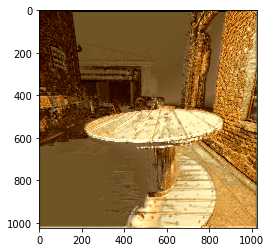

epoch [1001/20000], loss:0.0614
epoch [1101/20000], loss:0.0610
epoch [1201/20000], loss:0.0604
epoch [1301/20000], loss:0.0596
epoch [1401/20000], loss:0.0591
epoch [1501/20000], loss:0.0583
epoch [1601/20000], loss:0.0575
epoch [1701/20000], loss:0.0568
epoch [1801/20000], loss:0.0583
epoch [1901/20000], loss:0.0554


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


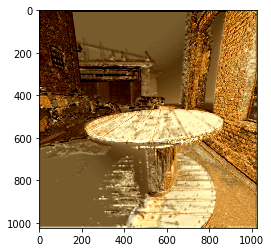

epoch [2001/20000], loss:0.0546
epoch [2101/20000], loss:0.0541
epoch [2201/20000], loss:0.0560
epoch [2301/20000], loss:0.0546
epoch [2401/20000], loss:0.0542
epoch [2501/20000], loss:0.0532
epoch [2601/20000], loss:0.0528
epoch [2701/20000], loss:0.0525
epoch [2801/20000], loss:0.0523
epoch [2901/20000], loss:0.0523


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


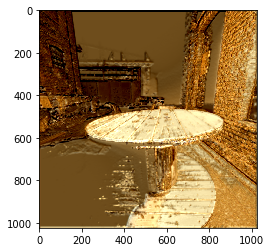

epoch [3001/20000], loss:0.0555
epoch [3101/20000], loss:0.0512
epoch [3201/20000], loss:0.0515
epoch [3301/20000], loss:0.0517
epoch [3401/20000], loss:0.0509
epoch [3501/20000], loss:0.0502
epoch [3601/20000], loss:0.0500
epoch [3701/20000], loss:0.0497
epoch [3801/20000], loss:0.0504
epoch [3901/20000], loss:0.0502


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


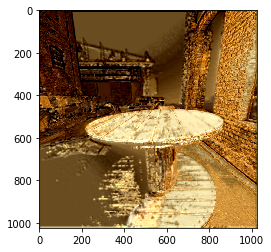

epoch [4001/20000], loss:0.0499
epoch [4101/20000], loss:0.0496
epoch [4201/20000], loss:0.0491
epoch [4301/20000], loss:0.0511
epoch [4401/20000], loss:0.0492
epoch [4501/20000], loss:0.0492
epoch [4601/20000], loss:0.0485
epoch [4701/20000], loss:0.0489
epoch [4801/20000], loss:0.0488
epoch [4901/20000], loss:0.0483


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


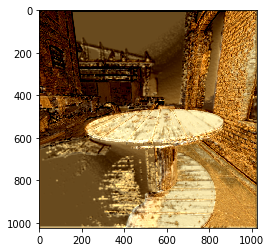

epoch [5001/20000], loss:0.0487
epoch [5101/20000], loss:0.0480
epoch [5201/20000], loss:0.0502
epoch [5301/20000], loss:0.0522
epoch [5401/20000], loss:0.0477
epoch [5501/20000], loss:0.0486
epoch [5601/20000], loss:0.0504
epoch [5701/20000], loss:0.0475
epoch [5801/20000], loss:0.0477
epoch [5901/20000], loss:0.0479


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


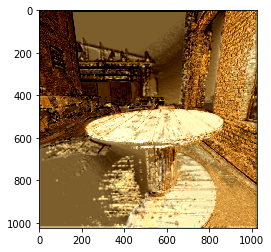

epoch [6001/20000], loss:0.0478
epoch [6101/20000], loss:0.0474
epoch [6201/20000], loss:0.0538
epoch [6301/20000], loss:0.0492
epoch [6401/20000], loss:0.0471
epoch [6501/20000], loss:0.0470
epoch [6601/20000], loss:0.0472
epoch [6701/20000], loss:0.0470
epoch [6801/20000], loss:0.0469
epoch [6901/20000], loss:0.0470


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


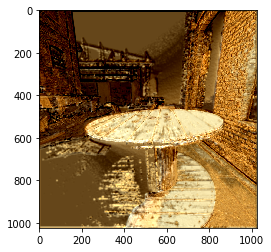

epoch [7001/20000], loss:0.0475
epoch [7101/20000], loss:0.0476
epoch [7201/20000], loss:0.0492
epoch [7301/20000], loss:0.0466
epoch [7401/20000], loss:0.0503
epoch [7501/20000], loss:0.0466
epoch [7601/20000], loss:0.0465
epoch [7701/20000], loss:0.0467
epoch [7801/20000], loss:0.0486
epoch [7901/20000], loss:0.0465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


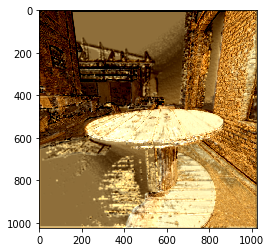

epoch [8001/20000], loss:0.0491
epoch [8101/20000], loss:0.0462
epoch [8201/20000], loss:0.0462
epoch [8301/20000], loss:0.0467
epoch [8401/20000], loss:0.0461
epoch [8501/20000], loss:0.0461
epoch [8601/20000], loss:0.0495
epoch [8701/20000], loss:0.0463
epoch [8801/20000], loss:0.0474
epoch [8901/20000], loss:0.0457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


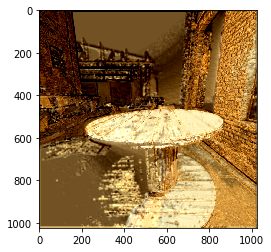

epoch [9001/20000], loss:0.0456
epoch [9101/20000], loss:0.0462
epoch [9201/20000], loss:0.0482
epoch [9301/20000], loss:0.0464
epoch [9401/20000], loss:0.0455
epoch [9501/20000], loss:0.0616
epoch [9601/20000], loss:0.0501
epoch [9701/20000], loss:0.0506
epoch [9801/20000], loss:0.0508
epoch [9901/20000], loss:0.0510


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


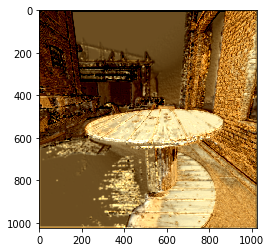

epoch [10001/20000], loss:0.0489
epoch [10101/20000], loss:0.0499
epoch [10201/20000], loss:0.0527
epoch [10301/20000], loss:0.0481
epoch [10401/20000], loss:0.0483
epoch [10501/20000], loss:0.0597
epoch [10601/20000], loss:0.0472
epoch [10701/20000], loss:0.0465
epoch [10801/20000], loss:0.0498
epoch [10901/20000], loss:0.0462


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


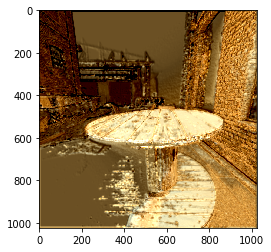

epoch [11001/20000], loss:0.0487
epoch [11101/20000], loss:0.0459
epoch [11201/20000], loss:0.0463
epoch [11301/20000], loss:0.0536
epoch [11401/20000], loss:0.0632
epoch [11501/20000], loss:0.0474
epoch [11601/20000], loss:0.0482
epoch [11701/20000], loss:0.0456
epoch [11801/20000], loss:0.0459
epoch [11901/20000], loss:0.0476


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


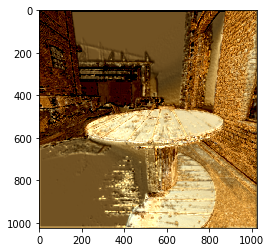

epoch [12001/20000], loss:0.0508
epoch [12101/20000], loss:0.0456
epoch [12201/20000], loss:0.0457
epoch [12301/20000], loss:0.0505
epoch [12401/20000], loss:0.0454
epoch [12501/20000], loss:0.0540
epoch [12601/20000], loss:0.0466
epoch [12701/20000], loss:0.0445
epoch [12801/20000], loss:0.0461
epoch [12901/20000], loss:0.0452


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


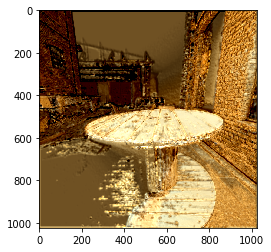

epoch [13001/20000], loss:0.0462
epoch [13101/20000], loss:0.0456
epoch [13201/20000], loss:0.0447
epoch [13301/20000], loss:0.0445
epoch [13401/20000], loss:0.0450
epoch [13501/20000], loss:0.0442
epoch [13601/20000], loss:0.0440
epoch [13701/20000], loss:0.0509
epoch [13801/20000], loss:0.0460
epoch [13901/20000], loss:0.0447


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


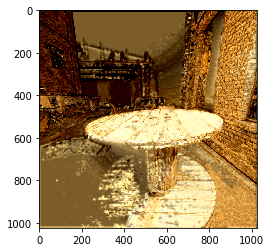

epoch [14001/20000], loss:0.0444
epoch [14101/20000], loss:0.0476
epoch [14201/20000], loss:0.0462
epoch [14301/20000], loss:0.0472
epoch [14401/20000], loss:0.0446
epoch [14501/20000], loss:0.0455
epoch [14601/20000], loss:0.0436
epoch [14701/20000], loss:0.0571
epoch [14801/20000], loss:0.0451
epoch [14901/20000], loss:0.0438


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


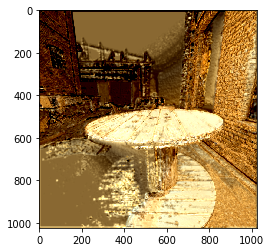

epoch [15001/20000], loss:0.0457
epoch [15101/20000], loss:0.0470
epoch [15201/20000], loss:0.0441
epoch [15301/20000], loss:0.0432
epoch [15401/20000], loss:0.0444
epoch [15501/20000], loss:0.0431
epoch [15601/20000], loss:0.0463
epoch [15701/20000], loss:0.0443
epoch [15801/20000], loss:0.0437
epoch [15901/20000], loss:0.0451


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


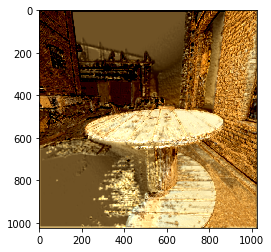

epoch [16001/20000], loss:0.0442
epoch [16101/20000], loss:0.0430
epoch [16201/20000], loss:0.0500
epoch [16301/20000], loss:0.0431
epoch [16401/20000], loss:0.0435
epoch [16501/20000], loss:0.0446
epoch [16601/20000], loss:0.0430
epoch [16701/20000], loss:0.0450
epoch [16801/20000], loss:0.0431
epoch [16901/20000], loss:0.0493


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


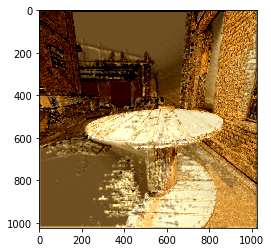

epoch [17001/20000], loss:0.0460
epoch [17101/20000], loss:0.0426
epoch [17201/20000], loss:0.0470
epoch [17301/20000], loss:0.0437
epoch [17401/20000], loss:0.0428
epoch [17501/20000], loss:0.0424
epoch [17601/20000], loss:0.0524
epoch [17701/20000], loss:0.0434
epoch [17801/20000], loss:0.0430
epoch [17901/20000], loss:0.0428


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


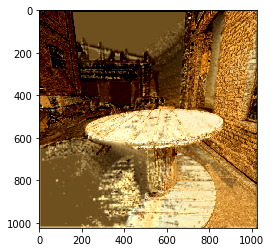

epoch [18001/20000], loss:0.0421
epoch [18101/20000], loss:0.0434
epoch [18201/20000], loss:0.0432
epoch [18301/20000], loss:0.0422
epoch [18401/20000], loss:0.0433
epoch [18501/20000], loss:0.0423
epoch [18601/20000], loss:0.0421
epoch [18701/20000], loss:0.0479
epoch [18801/20000], loss:0.0496
epoch [18901/20000], loss:0.0423


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


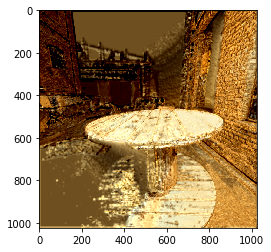

epoch [19001/20000], loss:0.0418
epoch [19101/20000], loss:0.0422
epoch [19201/20000], loss:0.0425
epoch [19301/20000], loss:0.0472
epoch [19401/20000], loss:0.0424
epoch [19501/20000], loss:0.0439
epoch [19601/20000], loss:0.0420
epoch [19701/20000], loss:0.0448
epoch [19801/20000], loss:0.0426
epoch [19901/20000], loss:0.0417
Finished Training


In [9]:
for epoch in range(num_epochs):
    for i,data in enumerate(trainloader):
        img, groundtruth = data
        img = img.unsqueeze(0)
        groundtruth = groundtruth.unsqueeze(0)
        # ===================forward=====================
        output = model(img)
        loss = distance(output, groundtruth)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch%1000 == 0:
            implotpred = plt.imshow(output.cpu().detach().permute(0,2,3,1).numpy().squeeze())
            plt.show()
    # ===================log========================
    if epoch%100 == 0:
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data))
print('Finished Training')

A part of the next cell should be in utils/save_model.py

In [10]:
PATH = './OneImageAutoEncoder_net.pth'
torch.save(model.state_dict(), PATH)

Input:


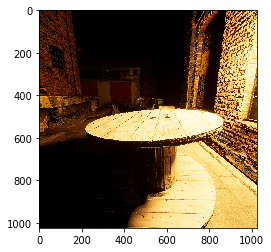

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted:


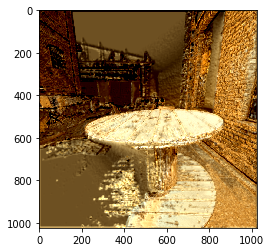

GroundTruth:


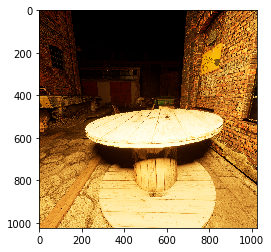

In [11]:
for i,data in enumerate(testloader):
        img, groundtruth = data
        img = img.unsqueeze(0)
        groundtruth = groundtruth.unsqueeze(0)
        # ===================forward=====================
        output = model(img)
        
        print ("Input:")
        implotin = plt.imshow(img.cpu().detach().permute(0,2,3,1).numpy().squeeze())
        plt.show()
        print ("Predicted:")
        implotpred = plt.imshow(output.cpu().detach().permute(0,2,3,1).numpy().squeeze())
        plt.show()
        print ("GroundTruth:")
        implotgt = plt.imshow(groundtruth.cpu().detach().permute(0,2,3,1).numpy().squeeze())
        plt.show()